<a href="https://colab.research.google.com/github/thonguyen241206/DAP391m/blob/main/Lab2c_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [21]:
def load_iris_data():
    iris = load_iris()
    # Chuyển dữ liệu thành DataFrame
    df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                     columns=iris['feature_names'] + ['target'])
    return df, iris['feature_names']

In [24]:
def prepare_multivariate_data(df, target_index=0, scale=True):
 # Tách features (X) và target (y)
  # Chọn tất cả các cột làm đặc trưng, trừ cột target
  features = df.iloc[:, [i for i in range(4) if i != target_index]]

  print("\nPhạm vi giá trị của các đặc trưng trước khi chuẩn hóa:")
  for column in features.columns:
      print(f"{column}:")
      print(f"  - Min: {features[column].min():.2f}")
      print(f"  - Max: {features[column].max():.2f}")
      print(f"  - Mean: {features[column].mean():.2f}")
      print(f"  - Std: {features[column].std():.2f}")

  # Chọn biến mục tiêu (y)
  target = df.iloc[:, target_index]

  # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
  X_train, X_test, y_train, y_test = train_test_split(
      features, target, test_size=0.2, random_state=42)
  # Chuẩn hóa dữ liệu nếu được yêu cầu
  if scale:
      scaler = StandardScaler()

      # Fit scaler trên tập train và transform cả train và test
      # Quan trọng: chỉ fit trên tập train để tránh data leakage
      X_train = scaler.fit_transform(X_train)
      X_test = scaler.transform(X_test)

      # Chuyển về DataFrame để giữ tên cột và in thông tin
      X_train = pd.DataFrame(X_train, columns=features.columns)
      X_test = pd.DataFrame(X_test, columns=features.columns)

      print("\nPhạm vi giá trị sau khi chuẩn hóa (tập train):")
      for column in X_train.columns:
          print(f"{column}:")
          print(f"  - Min: {X_train[column].min():.2f}")
          print(f"  - Max: {X_train[column].max():.2f}")
          print(f"  - Mean: {X_train[column].mean():.2f}")
          print(f"  - Std: {X_train[column].std():.2f}")

      # Visualization của phân phối trước và sau khi chuẩn hóa
      plt.figure(figsize=(15, 5))

      # Trước khi chuẩn hóa
      plt.subplot(1, 2, 1)
      features.boxplot()
      plt.title('Phân phối trước khi chuẩn hóa')
      plt.xticks(rotation=45)

      # Sau khi chuẩn hóa
      plt.subplot(1, 2, 2)
      X_train.boxplot()
      plt.title('Phân phối sau khi chuẩn hóa')
      plt.xticks(rotation=45)

      plt.tight_layout()
      plt.show()
  return X_train, X_test, y_train, y_test

In [25]:

def train_multivariate_model(X_train, X_test, y_train, y_test, feature_names, target_name):
    # Khởi tạo và huấn luyện mô hình
    model = LinearRegression()
    model.fit(X_train, y_train)
    # Dự đoán
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # Tính các metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"\nKết quả hồi quy đa biến cho {target_name}")
    print("\nHệ số hồi quy:")
    for name, coef in zip(feature_names, model.coef_):
        print(f"{name}: {coef:.4f}")
    print(f"Hệ số tự do (w0): {model.intercept_:.4f}")

    print(f"\nMetrics đánh giá:")
    print(f"Train MSE: {train_mse:.4f}")
    print(f"Test MSE: {test_mse:.4f}")
    print(f"Train R2 Score: {train_r2:.4f}")
    print(f"Test R2 Score: {test_r2:.4f}")

    # Vẽ đồ thị so sánh giá trị thực tế và dự đoán
    plt.figure(figsize=(12, 5))
    # Tập huấn luyện
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, color='blue')
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
    plt.xlabel('Giá trị thực tế')
    plt.ylabel('Giá trị dự đoán')
    plt.title('Tập huấn luyện')
    plt.grid(True)
    # Tập kiểm tra
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Giá trị thực tế')
    plt.ylabel('Giá trị dự đoán')
    plt.title('Tập kiểm tra')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Phân tích tầm quan trọng của các đặc trưng
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Absolute Coefficient': np.abs(model.coef_)
    })
    feature_importance = feature_importance.sort_values('Absolute Coefficient', ascending=False)

    plt.figure(figsize=(10, 5))
    plt.bar(feature_importance['Feature'], feature_importance['Absolute Coefficient'])
    plt.xticks(rotation=45)
    plt.xlabel('Đặc trưng')
    plt.ylabel('Độ lớn hệ số hồi quy')
    plt.title('Tầm quan trọng của các đặc trưng')
    plt.tight_layout()
    plt.show()

    return model


Phạm vi giá trị của các đặc trưng trước khi chuẩn hóa:
sepal width (cm):
  - Min: 2.00
  - Max: 4.40
  - Mean: 3.06
  - Std: 0.44
petal length (cm):
  - Min: 1.00
  - Max: 6.90
  - Mean: 3.76
  - Std: 1.77
petal width (cm):
  - Min: 0.10
  - Max: 2.50
  - Mean: 1.20
  - Std: 0.76

Phạm vi giá trị sau khi chuẩn hóa (tập train):
sepal width (cm):
  - Min: -2.37
  - Max: 2.99
  - Mean: -0.00
  - Std: 1.00
petal length (cm):
  - Min: -1.56
  - Max: 1.70
  - Mean: -0.00
  - Std: 1.00
petal width (cm):
  - Min: -1.45
  - Max: 1.76
  - Mean: -0.00
  - Std: 1.00


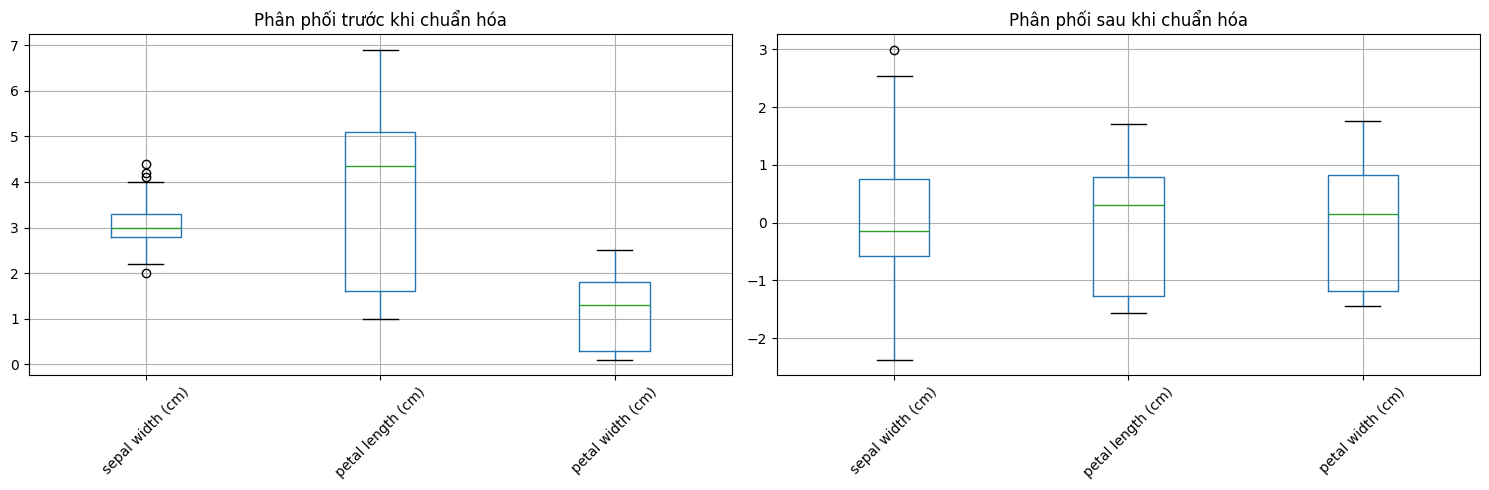


Kết quả hồi quy đa biến cho sepal length (cm)

Hệ số hồi quy:
sepal width (cm): 0.2967
petal length (cm): 1.3217
petal width (cm): -0.5051
Hệ số tự do (w0): 5.8092

Metrics đánh giá:
Train MSE: 0.0963
Test MSE: 0.1021
Train R2 Score: 0.8569
Test R2 Score: 0.8520


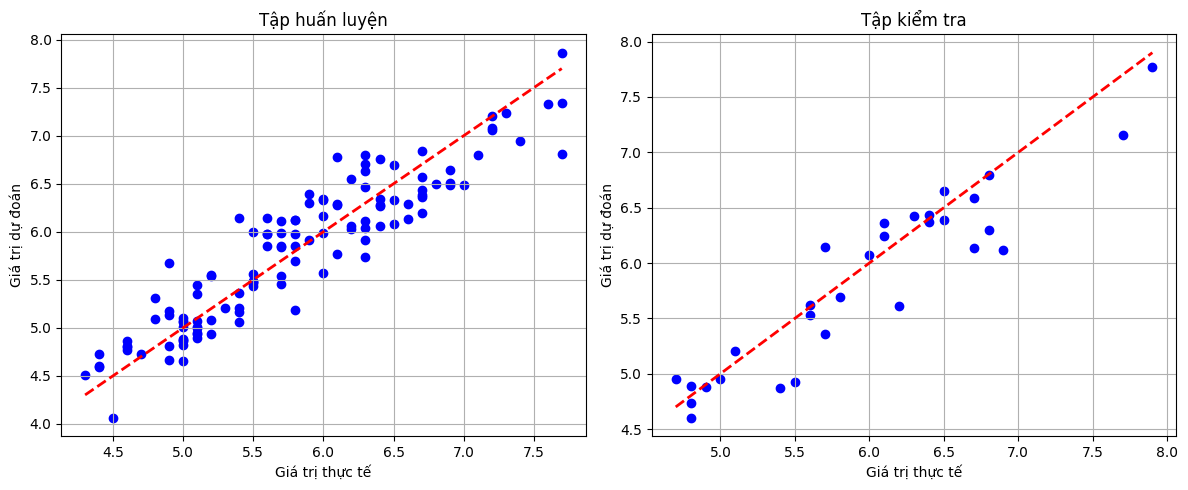

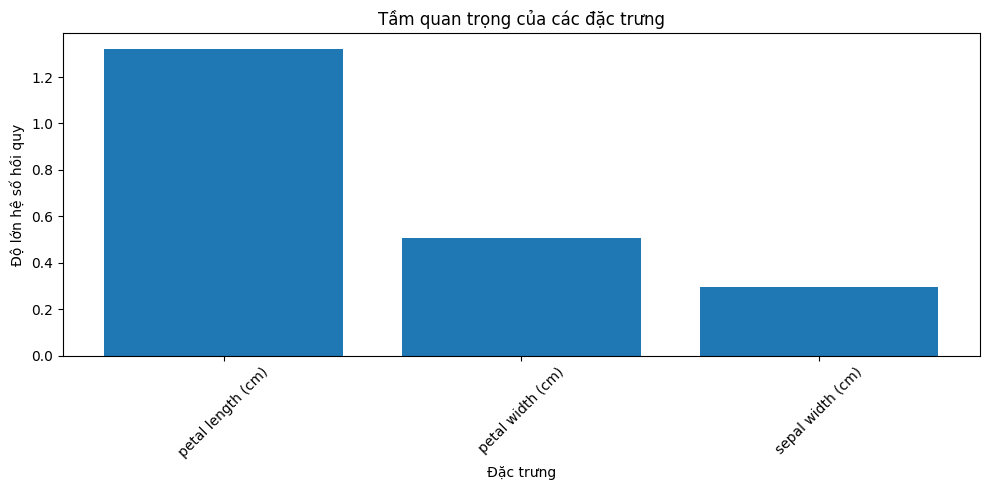


Demo dự đoán:
Đầu vào: {'sepal width (cm)': np.float64(-0.5850597637540184), 'petal length (cm)': np.float64(0.5577752408630077), 'petal width (cm)': np.float64(0.022247505360231082)}
Dự đoán sepal length (cm): 6.36


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
# Load dữ liệu
df, feature_names = load_iris_data()
target_index = 0
target_name = feature_names[target_index]

# Chuẩn bị dữ liệu
X_train, X_test, y_train, y_test = prepare_multivariate_data(
    df, target_index=target_index, scale=True)

input_features = [name for i, name in enumerate(feature_names) if i != target_index]

# Huấn luyện và đánh giá mô hình
model = train_multivariate_model(
    X_train, X_test, y_train, y_test,
    input_features, target_name)

print("\nDemo dự đoán:")
sample_input = X_test.iloc[0]
print("Đầu vào:", dict(sample_input))
prediction = model.predict([sample_input])[0]
print(f"Dự đoán {target_name}: {prediction:.2f}")